In [8]:
import pandas as pd
import numpy as np

In [9]:
crashes = pd.read_csv('airplane_crashes.csv', sep  = ';')

In [10]:
crashes = pd.DataFrame(crashes)

In [11]:
crashes

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,1:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,1:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


**Analizar en qué variables hay valores nulos y el porcentaje de los mismos.**

In [12]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [13]:
crashes.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [15]:
len(crashes)

5268

In [16]:
crashes.isnull().sum() * 100 / len(crashes)

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

**Dibujar la tendencia de número accidentes en escala temporal, agrupando el dataset por años.
¿Puede decirse que hay un incremento o decremento de la siniestralidad? ¿Qué relación tiene con
la expansión del tráfico aéreo en el tiempo?**

In [17]:
type(crashes['Date'][0])

str

In [18]:
crashes['Date']

0       09/17/1908
1       07/12/1912
2       08/06/1913
3       09/09/1913
4       10/17/1913
5       03/05/1915
6       09/03/1915
7       07/28/1916
8       09/24/1916
9       10/01/1916
10      11/21/1916
11      11/28/1916
12      03/04/1917
13      03/30/1917
14      05/14/1917
15      06/14/1917
16      08/21/1917
17      10/20/1917
18      04/07/1918
19      05/10/1918
20      08/11/1918
21      12/16/1918
22      05/25/1919
23      07/19/1919
24      10/02/1919
25      10/14/1919
26      10/20/1919
27      10/30/1919
28      03/10/1920
29      03/30/1920
           ...    
5238    11/13/2008
5239    11/16/2008
5240    11/27/2008
5241    12/03/2008
5242    12/11/2008
5243    12/15/2008
5244    01/04/2009
5245    01/15/2009
5246    02/07/2009
5247    02/07/2009
5248    02/12/2009
5249    02/15/2009
5250    02/20/2009
5251    02/25/2009
5252    03/09/2009
5253    03/12/2009
5254    03/22/2009
5255    03/23/2009
5256    04/01/2009
5257    04/06/2009
5258    04/09/2009
5259    04/1

In [19]:
crashes['Date'] = pd.to_datetime(crashes['Date'], dayfirst = True)

In [20]:
crashes['Date']

0      1908-09-17
1      1912-12-07
2      1913-06-08
3      1913-09-09
4      1913-10-17
5      1915-05-03
6      1915-03-09
7      1916-07-28
8      1916-09-24
9      1916-01-10
10     1916-11-21
11     1916-11-28
12     1917-04-03
13     1917-03-30
14     1917-05-14
15     1917-06-14
16     1917-08-21
17     1917-10-20
18     1918-07-04
19     1918-10-05
20     1918-11-08
21     1918-12-16
22     1919-05-25
23     1919-07-19
24     1919-02-10
25     1919-10-14
26     1919-10-20
27     1919-10-30
28     1920-10-03
29     1920-03-30
          ...    
5238   2008-11-13
5239   2008-11-16
5240   2008-11-27
5241   2008-03-12
5242   2008-11-12
5243   2008-12-15
5244   2009-04-01
5245   2009-01-15
5246   2009-07-02
5247   2009-07-02
5248   2009-12-02
5249   2009-02-15
5250   2009-02-20
5251   2009-02-25
5252   2009-09-03
5253   2009-12-03
5254   2009-03-22
5255   2009-03-23
5256   2009-01-04
5257   2009-06-04
5258   2009-09-04
5259   2009-04-17
5260   2009-04-17
5261   2009-04-29
5262   200

In [21]:
crashes

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-12-07,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-06-08,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,1915-05-03,1:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,1915-03-09,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,1916-09-24,1:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,1916-01-10,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [22]:
 #crashes_bydate = crashes.set_index('Date')

In [23]:
crashes_per_year = crashes.groupby(crashes.Date.dt.year)

In [24]:
yearly_crash = crashes_per_year['Date'].count()

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 4)

Populating the interactive namespace from numpy and matplotlib


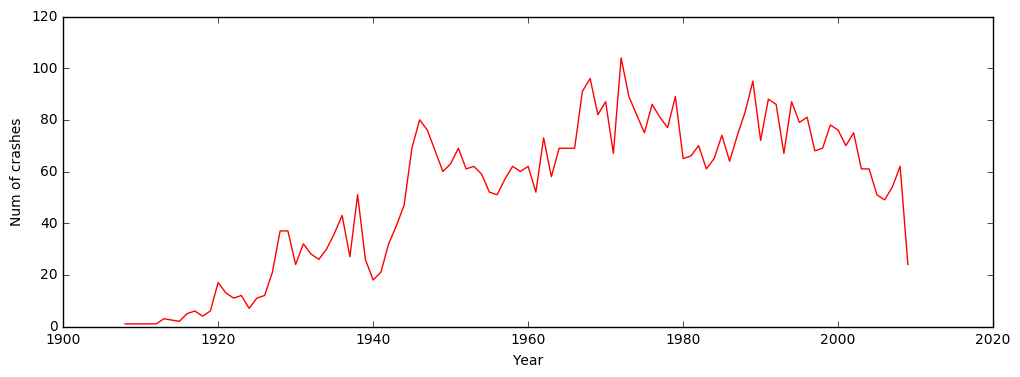

In [26]:
plt.plot(yearly_crash, 'r-')
plt.ylabel('Num of crashes')
plt.xlabel('Year')

*Tal y como se aprecia en la gráfica, el número de incidentes ha ido en aumento aunque se puede constatar que a partir de la década de los 90s, y de forma más drástica en los 00s, la siniestralidad se ha reducido considerablemente. Ésto puede asociarse a las notables mejoras en la seguridad, tecnología y comunicaciones ya que, si tenemos en cuenta el número de incidentes respecto al total de vuelos efectuados, la reducción es notable.*

**Obtener y dibujar las frecuencias del número de accidentes por tipo de avión. ¿se parece a alguna
distribución conocida? Hacer el análisis en cuanto a las rutas. ¿hay algún hallazgo que parezca
relevante?**

*Frecuencia de accidentes por tipo de avión*

In [27]:
(crashes['Type'].value_counts()).head(50)

Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
Yakovlev YAK-40                              37
Antonov AN-26                                36
Junkers JU-52/3m                             32
Douglas C-47B                                29
De Havilland DH-4                            28
Douglas DC-6B                                27
Breguet 14                                   23
Curtiss C-46A                                21
Douglas C-47-DL                              20
Douglas DC-6                                 20
Antonov AN-24                                19
McDonnell Douglas DC-9-32                    19
Antonov AN-12                                19
Embraer 110P1 Bandeirante                    18
Curtiss C-46                                 18
Junkers F-13                            

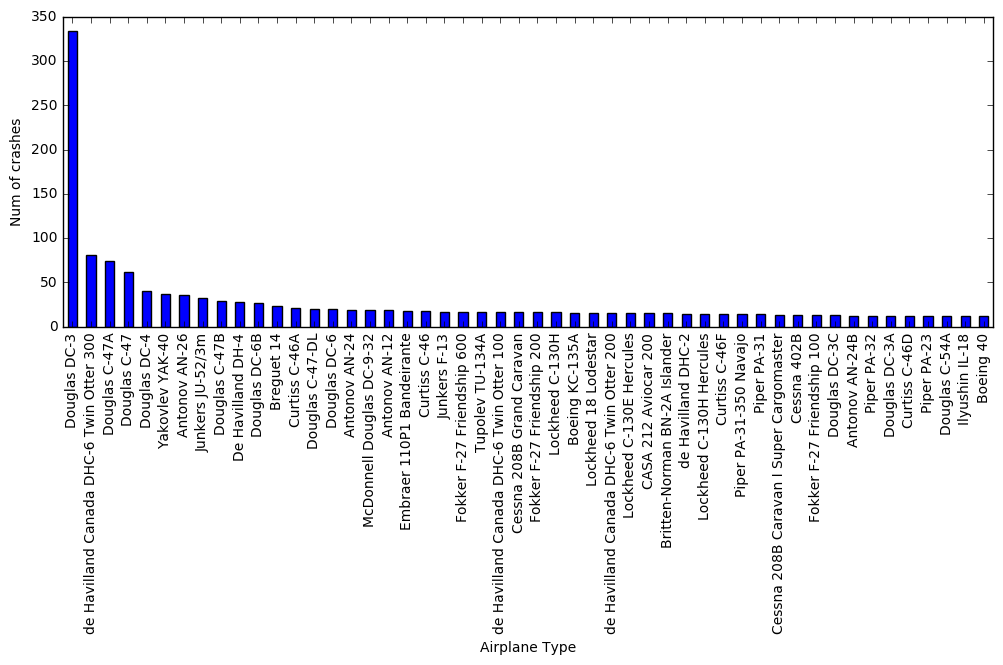

In [28]:
((crashes['Type'].value_counts()).head(50)).plot(kind = 'bar')
plt.ylabel('Num of crashes')
plt.xlabel('Airplane Type')

*La gráfica de cómo se distribuyen los incidentes por tipo de avión se ve bastante desbalanceada (gran cantidad de siniestros acumulados en pocos modelos de avión) aunque recuerda a la función de densidad de probabilidad correspondiente a la distribución exponencial o incluso a la distribución de Pareto.*

*Frecuencia de accidentes por Ruta*

In [29]:
(crashes['Route'].value_counts()).head(50)

Training                          81
Sightseeing                       29
Test flight                       17
Test                               6
Sao Paulo - Rio de Janeiro         5
Saigon - Paris                     4
Sao Paulo - Porto Alegre           4
Villavicencio - Mitu               4
Bogota - Barranquilla              4
Guayaquil - Cuenca                 3
Barranquilla - Bogota              3
Rome - Cairo                       3
Rome - Athens                      3
Otis AFB                           3
Istanbul - Ankara                  3
Villavicencio - Bogota             3
Demonstration                      3
Hue - Da Nang                      3
Guayaquil - Quito                  3
Davao - Manila                     3
London - Glasgow                   3
Bangkok - Hong Kong                3
Quito - Cuenca                     3
Buenos Aires - Santiago            3
Burbank - Oakland                  3
Cleveland - Chicago                3
Paris - London                     3
P

*La mayoría de accidentes se corresponden con entrenamientos, turismo(¿se referirá a vuelos privados? jets, etc), tests de vuelos y demostraciones que entrañan, a priori, un riesgo mayor. No obstante, es un dato algo alarmante el caso de los vuelos nacionales en Brasil:*
+ *Sao Paulo - Rio de Janeiro : 5*
+ *Sao Paulo - Porto Alegre : 4*
+ *Rio de Janeiro - Sao Paulo : 3*
+ *Sao Paulo - Bauru : 2*

**Estudiar los tipos de avión más "peligrosos", por número de accidentes y número de muertes
("fatalities"). Haced el análisis con todos los datos, y después intentando separar en la medida de
lo posible los aviones militares de la aviación comercial.**

*Tipos de avión implicados en un mayor número de accidentes*

In [30]:
((crashes.groupby('Type')['Date'].count()).sort_values(ascending = False)).head(20)

Type
Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
Yakovlev YAK-40                              37
Antonov AN-26                                36
Junkers JU-52/3m                             32
Douglas C-47B                                29
De Havilland DH-4                            28
Douglas DC-6B                                27
Breguet 14                                   23
Curtiss C-46A                                21
Douglas C-47-DL                              20
Douglas DC-6                                 20
McDonnell Douglas DC-9-32                    19
Antonov AN-12                                19
Antonov AN-24                                19
Embraer 110P1 Bandeirante                    18
Curtiss C-46                                 18
Name: Date, dtype: int64

*Tipos de avión y la frecuencia de muertes en sus accidentes*

In [31]:
((crashes.groupby('Type')['Fatalities'].sum()).sort_values(ascending = False)).head(20)

Type
Douglas DC-3                                4793.0
Antonov AN-26                               1068.0
Douglas DC-6B                               1055.0
Douglas C-47                                1046.0
McDonnell Douglas DC-9-32                    951.0
Douglas DC-4                                 930.0
Ilyushin IL-18B                              852.0
Yakovlev YAK-40                              834.0
Tupolev TU-134A                              809.0
McDonnell Douglas DC-10-10                   804.0
de Havilland Canada DHC-6 Twin Otter 300     796.0
Lockheed C-130H                              786.0
McDonnell Douglas MD-82                      695.0
Tupolev TU-154B                              691.0
Ilyushin IL-18D                              668.0
Antonov AN-24                                664.0
Tupolev TU-154M                              640.0
Douglas C-47A                                609.0
Boeing B-747-121 / Boeing B-747-206B         583.0
Tupolev TU-104B           

*Operadores aéreos del dataset*

In [32]:
crashes['Operator'].value_counts()

Aeroflot                                      179
Military - U.S. Air Force                     176
Air France                                     70
Deutsche Lufthansa                             65
Air Taxi                                       44
United Air Lines                               44
China National Aviation Corporation            44
Military - U.S. Army Air Forces                43
Pan American World Airways                     41
Military - Royal Air Force                     36
US Aerial Mail Service                         36
American Airlines                              36
Military - U.S. Navy                           36
Indian Airlines                                34
Philippine Air Lines                           33
KLM Royal Dutch Airlines                       33
Private                                        31
Aeropostale                                    26
Northwest Orient Airlines                      25
Eastern Air Lines                              25


*Localización de los operadores de carácter militar/comercial para la segmentación de la muestra*
+ *Obtención del número de accidentes por avión de cada segmento (conteo de las fechas de accidentes registradas)*
+ *Obtención del número de muertes por avión de cada segmento*

In [33]:
military_crashes = crashes[crashes['Operator'].str.contains("Military") == True]

In [34]:
((military_crashes.groupby('Type')['Date'].count()).sort_values(ascending = False)).head(10)

Type
Douglas C-47                27
Lockheed C-130H             16
Antonov AN-26               15
Boeing KC-135A              15
Lockheed C-130E Hercules    14
Douglas C-47B               14
Lockheed C-130H Hercules    13
Douglas C-47A               12
Antonov AN-12               10
Mil Mi-8 (helicopter)        9
Name: Date, dtype: int64

In [35]:
((military_crashes.groupby('Type')['Fatalities'].sum()).sort_values(ascending = False)).head(10)

Type
Lockheed C-130H             786.0
Douglas C-47                616.0
Antonov AN-26               539.0
Antonov AN-12               370.0
Mil Mi-8 (helicopter)       351.0
Antonov AN-32               322.0
Antonov AN-22               302.0
Ilyushin Il-76MD            275.0
Lockheed C-130B Hercules    274.0
Douglas C-47A               245.0
Name: Fatalities, dtype: float64

In [36]:
commercial_crashes = crashes[crashes['Operator'].str.contains("Military") == False]

In [46]:
((commercial_crashes.groupby('Type')['Date'].count()).sort_values(ascending = False)).head(10)

Type
Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     77
Douglas C-47A                                62
Douglas DC-4                                 39
Yakovlev YAK-40                              36
Douglas C-47                                 34
Junkers JU-52/3m                             32
De Havilland DH-4                            28
Douglas DC-6B                                26
Breguet 14                                   23
Name: Date, dtype: int64

In [47]:
((commercial_crashes.groupby('Type')['Fatalities'].sum()).sort_values(ascending = False)).head(10)

Type
Douglas DC-3                                4780.0
Douglas DC-6B                               1017.0
McDonnell Douglas DC-9-32                    951.0
Douglas DC-4                                 912.0
Ilyushin IL-18B                              852.0
Tupolev TU-134A                              809.0
Yakovlev YAK-40                              808.0
McDonnell Douglas DC-10-10                   804.0
de Havilland Canada DHC-6 Twin Otter 300     745.0
McDonnell Douglas MD-82                      695.0
Name: Fatalities, dtype: float64

*Algunos sencillos cálculos para verificar que hemos conservado la totalidad de la muestra tras la segmentación*

In [48]:
commercial_crashes['Fatalities'].sum()

85660.0

In [49]:
military_crashes['Fatalities'].sum()

19663.0

In [50]:
crashes['Fatalities'].sum()

105479.0

In [51]:
(crashes[crashes['Operator'].isnull()])['Fatalities'].sum()

156.0

In [52]:
commercial_crashes['Date'].count()

4469

In [53]:
military_crashes['Date'].count()

781

In [54]:
crashes['Date'].count()

5268

**Buscar en los resúmenes ("Summary") de los accidentes la mención a explosiones, y comparar la
media de fallecidos en esos vuelos y el resto, de manera descriptiva y con algún test estadístico.**

*Localizamos el string 'xplo' en los resúmenes del dataset y, por eliminación, obtenemos el dataframe con los resultados que no mencionan nada al respecto de las explosiones*

In [55]:
due_to_explosions = crashes[crashes['Summary'].str.contains('xplo') == True]

In [56]:
due_to_explosions['Fatalities'].mean()

38.24338624338624

In [57]:
without_explosions = crashes[crashes['Summary'].str.contains('xplo') == False]

In [58]:
without_explosions['Fatalities'].mean()

20.348996155489107

In [69]:
from scipy.stats import ttest_ind_from_stats

*Vamos a aplicar un test t para la comparación de medias. No podemos usar ttest_ind ya que necesita que el número de observaciones de ambas muestras sea igual. Recurrimos a ttest_ind_from_stats que utiliza como parámetros la media, la desviación típica y el número de observaciones de cada muestra, respectivamente.*

In [70]:
expl_arr = np.array(due_to_explosions['Fatalities'])

In [71]:
np.std(expl_arr)

54.467834507539983

In [72]:
others = np.array(without_explosions['Fatalities'])

*expl_arr no contiene nan por lo que podemos calcular la desviación típica con la fórmula anterior pero no es el caso del array others por lo que recurrimos a np.nanstd() que no contabiliza los nan en el cálculo de la desviación.*

In [73]:
np.nanstd(others)

32.929719928460322

In [74]:
len(expl_arr)

189

In [75]:
len(others)

4689

*Ya que no han sido contabilizados para el cálculo de la std, procedemos a eliminar los nan del número de observaciones que pasaremos como parámetro del test t.*

In [76]:
others_nullvalues = len(others[np.isnan(others)])

In [81]:
len(others) - others_nullvalues

4682

In [82]:
ttest_ind_from_stats(due_to_explosions['Fatalities'].mean(),np.std(expl_arr),len(expl_arr),without_explosions['Fatalities'].mean(),np.nanstd(others),(len(others) - others_nullvalues))

Ttest_indResult(statistic=7.0905304543549112, pvalue=1.5275416657042945e-12)

*El test establece una hipótesis nula H0 que presupone la igualdad de ambas medias pero al haber obtenido un p-valor tan pequeño, muy inferior a 0.05 podemos rechazar la H0 y concluir que son significativamente distintas las medias de ambas muestras.*